In [1]:
%matplotlib inline

import operator as op 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import itertools
from utils import *


# 1) Logistic Regression on simple dataset with two classes

Here we'll use a regularized logistic regression model to classify points that belong to two possible classes. Because we only have two classes here, the true labels of the data points are denoted by 0 or 1. 

Given a training example $x$ and a parameter vector $\theta$, the prediction of our model is given by 
\begin{equation}
\hat{y}(x)_{\theta} = \frac{1}{1 + e^{-\theta^T x}}
\end{equation}

This function is simply a sigmoid, meaning that our output value always lies beteen 0 and 1. The value of the prediction can be interpreted as the probability of the training sample $x$ to belong to the class '1'. Whenever $\theta^T x \geq 0$, we have $\hat{y}(x)_{\theta} \geq 0.5$ and the sample $x$ will be predicted to belong to class '1'. 

To perform logistic regression, we need to specify a cost function. We will use the following cost function:
\begin{align}
J(\theta)  &= -\frac{1}{m} \Big[ \sum_{i =1}^m y^{(i)} \text{log}\,(\,\hat{y}_{\theta}(x^{(i)})\,) + (1 - y^{(i)})\, \text{log}\Big(1 - \hat{y}_{\theta}(x^{(i)})\Big) \Big] \nonumber \\
&+ \frac{\lambda}{2 m} \sum_{i = 1}^n \theta_i^2
\end{align}
where $\hat{y}_{\theta}(x^{(i)})$ and $y^{(i)}$ denote the predicted and true label of training example $x^{(i)}$, where $i = 1, \cdots m$ with $m$ the total number of training examples. If each training example consists of two features, we will have $x^{(i)} \in \mathbb{R}^{m\times2}$. The last term is a regularisation term. 

When performing gradient descent to find the optimal parameter vector $\theta$, we also require the gradient $\partial_{\theta} J(\theta)$. Given this gradient, the parameters $\theta$ are updated using the rule
\begin{equation}
\theta_k \rightarrow \theta_k - \alpha \partial_{\theta} J(\theta)
\end{equation}
where $\alpha$ is the learning rate. In this way, we're updating each parameter such that the cost decreases. Evaluating $\partial_{\theta} J(\theta)$ gives:
\begin{equation}
\theta_k \rightarrow \theta_k\left(1 - \alpha \frac{\lambda}{m}\right) - \frac{\alpha}{m} \sum_{i = 1}^m (\,\hat{y}_{\theta}(x^{(i)}) - y^{(i)}) x_k^{(i)}
\end{equation}

In [2]:
#some parameters
nb_c = 2 #number of classes
degree = 3
lr = 0.1
nIters = 1000
lamb = 1 #regularization parameter

In [3]:
#data
data = np.genfromtxt('Data.txt', delimiter = ',')
X = data[:,:2]
X = (X - np.mean(X, axis = 0))/np.std(X, axis = 0) #normalize the data
y = data[:,2]; y = np.reshape(y, (len(y), 1)) #y is an array consisting of 0's, 1's, etc.. as labels for different classes

#create new features, polynomial of degree 'degree'.
X, nbFeatures = mapFeatures(X, degree)

## Visualise the data


To classify these data, a nonlinear decision boundary is required, which is why we will create additional features such as $\,x_1^2, x_2^2, x_1 x_2, x_1^3, x_2^3, x_1^2 x_2, \cdots$. We fill fit a polynomial and to prevent overfitting we use regularization.

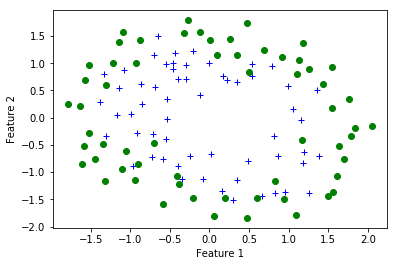

In [4]:
PlotData(X,y)
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')

## Train model

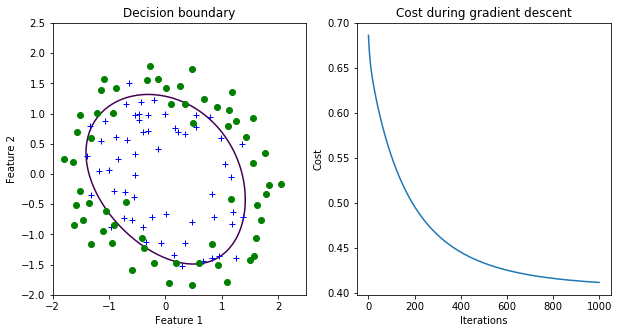

In [5]:
#initialize parameters
initial_theta = np.zeros((nbFeatures, 1))

#find final theta values using gradient descent.
finalTheta, costValues = GradientDescent(X, y, initial_theta, lr, lamb, nIters)

#Plot the decision boundary
fig, axs = plt.subplots(1,2, figsize = (10, 5)); axs = axs.ravel()
plt.axes(axs[0])
PlotData(X,y)
plotDecisionBoundary(finalTheta, X, y, degree)
plt.xlabel('Feature 1'); plt.ylabel('Feature 2'); plt.title('Decision boundary')

#Plot the cost as a function of the number of iterations of gradient descent
plt.axes(axs[1])
plt.plot(np.arange(nIters), costValues)
plt.xlabel('Iterations'); plt.ylabel('Cost'); plt.title('Cost during gradient descent')    


# 2) Logistic regression with more classes 

Use the iris dataset

In [6]:
X, y =datasets.load_iris(return_X_y=True)

In [7]:
#some parameters
nb_c = 3 #number of classes
degree = 2
lr = 0.1
nIters = 1000
lamb = 4 #regularization parameter

#data
X = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)
y = np.reshape(y, (len(y), 1))
X, nbFeatures = mapFeatures(X, degree)

In [8]:
#Split in training and test. Should of course do this multiple times with different
#random splits but for now let's just do it once.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#initialize parameters
initial_theta = np.zeros((nbFeatures, 1))
allTheta = np.zeros((nb_c, nbFeatures)) #to store the learned theta parameters

#for each class, find final theta values. We will use all-vs-one to predict the class
for c in range(nb_c):
    finalTheta, costValues = GradientDescent(X_train, y_train==c, initial_theta, lr, lamb, nIters)
    allTheta[c,:] = np.reshape(finalTheta, nbFeatures)   

In [9]:
#find out accuracy on training and test set
p_train = predictOneVsAll(allTheta, X_train)
pcorrect_train = FractionCorrect(p_train, y_train)

p_test = predictOneVsAll(allTheta, X_test)
pcorrect_test = FractionCorrect(p_test, y_test)

print('Accuracy on training set:\t{}').format(pcorrect_train)
print('Accuracy on test set:\t\t{}').format(pcorrect_test)

Accuracy on training set:	0.980952380952
Accuracy on test set:		0.911111111111


Now create multiple random splits of training and test set, for each calculate the 
accuracy in the predictions of training and test, then take average

In [10]:
#Get average errors using multiple random splits of data into training and test sets
pcor_train, pcor_test = PredictAccuracy(X, y, lamb, lr, nIters, nb_c)

#print(pcor_train)
#print(pcor_test)

print('Mean training correct fraction:\t{}').format(np.mean(pcor_train))
print('Mean test correct fraction:\t{}').format(np.mean(pcor_test))

Mean training correct fraction:	0.96619047619
Mean test correct fraction:	0.955555555556


### Look at some diagnostics